In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
weather = pd.read_csv("../data/dwh/WeatherFact.csv")
vehicle_crashes = pd.read_csv("../data/dwh/VehicleCrashFact2023.csv")

C:\Users\tymoteusz.urban\AppData\Local\Temp\ipykernel_50560\4194408582.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_crashes = pd.read_csv("../data/dwh/VehicleCrashFact2023.csv")


## sposób 1

In [84]:
# tworzymy klasy deszczu
weather['RainClass'] = weather['Rain'].apply(lambda x: round(x*2) / 2)

In [85]:
# liczymi liczbę występowania danej klasy deszczu
rain_counts = weather['RainClass'].value_counts()

In [86]:
# dodajemy do tabelki
weather['RainClassCount'] = weather['RainClass'].map(rain_counts)

In [87]:
# to jeśi chcemy wypadki, bez tego jeśli chcemy badać liczbę samochodów
# crashes = vehicle_crashes[['ReportNumber', 'LocationAreaKey', 'DateHourKey']].groupby('ReportNumber').agg('max').reset_index()
crashes = vehicle_crashes

In [88]:
# łączymy wypadki z pogodą
crash_weather = crashes.merge(weather, on=['LocationAreaKey', 'DateHourKey'])

In [89]:
# grupujemy po klasie deszczu, patrzymy ile jest wypadków 
# dla rain count bierzemy max ale może być też min, moda cokolwiek bo wszędzie jest tak samo
crashes_by_rain = crash_weather.groupby('RainClass').agg(
    crashcount = pd.NamedAgg(column="ReportNumber", aggfunc="count"),
    raincount = pd.NamedAgg(column='RainClassCount', aggfunc="max")
).reset_index()

In [90]:
crashes_by_rain['CrashCountNorm'] = crashes_by_rain['crashcount'] / crashes_by_rain['raincount']

Text(0, 0.5, 'deszcz w jakiejs tam jednostce')

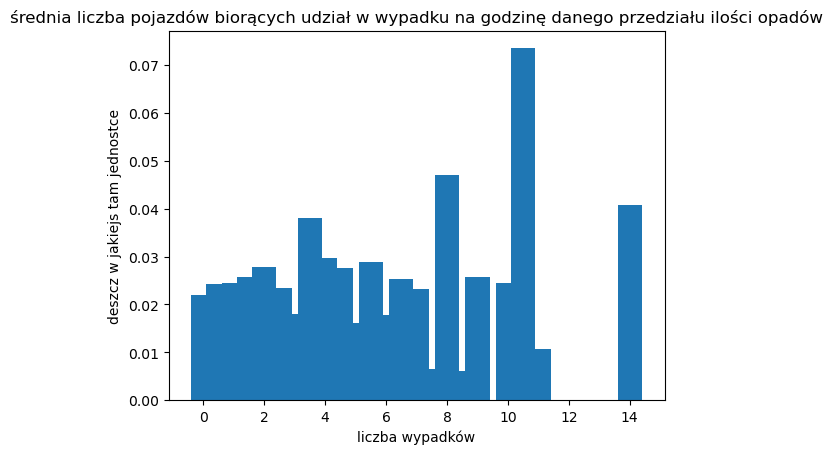

In [92]:
# dla pojazdów
plt.bar(crashes_by_rain['RainClass'], crashes_by_rain['CrashCountNorm'])
plt.title('średnia liczba pojazdów biorących udział w wypadku na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

Text(0, 0.5, 'deszcz w jakiejs tam jednostce')

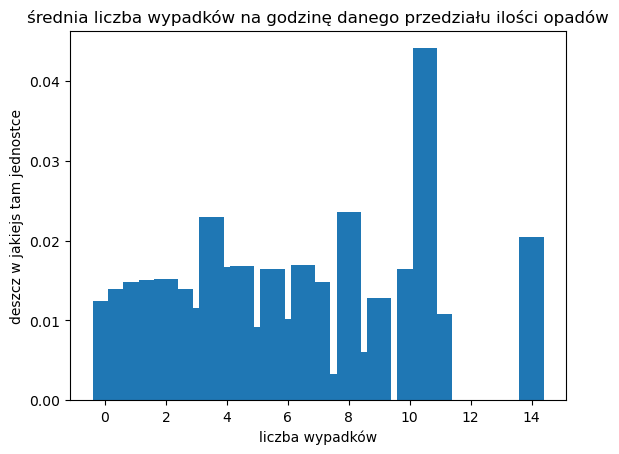

In [83]:
# dla wypadków
plt.bar(crashes_by_rain['RainClass'], crashes_by_rain['CrashCountNorm'])
plt.title('średnia liczba wypadków na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

## sposób 2

In [93]:
# tworzymy klasy deszczu
weather['RainClass'] = weather['Rain'].apply(lambda x: round(x*2) / 2)

In [94]:
# liczymi liczbę występowania danej klasy deszczu
rain_counts = weather['RainClass'].value_counts()

In [96]:
# to jeśi chcemy wypadki, bez tego jeśli chcemy badać liczbę samochodów
crashes = vehicle_crashes[['ReportNumber', 'LocationAreaKey', 'DateHourKey']].groupby('ReportNumber').agg('max').reset_index()

In [97]:
# łączymy wypadki z pogodą
crash_weather = crashes.merge(weather, on=['LocationAreaKey', 'DateHourKey'])

In [98]:
# grupujemy po klasie deszczu, patrzymy ile jest wypadków 
crashes_by_rain = crash_weather.groupby('RainClass').agg(
    crashcount = pd.NamedAgg(column="ReportNumber", aggfunc="count")
).reset_index()

In [99]:
# mergujemy z liczbą deszczów
crashes_rain_count = crashes_by_rain.merge(rain_counts, on='RainClass')

In [100]:
# normalizujemy
crashes_rain_count['CrashCountNorm'] = crashes_rain_count['crashcount'] / crashes_rain_count['count']

Text(0, 0.5, 'deszcz w jakiejs tam jednostce')

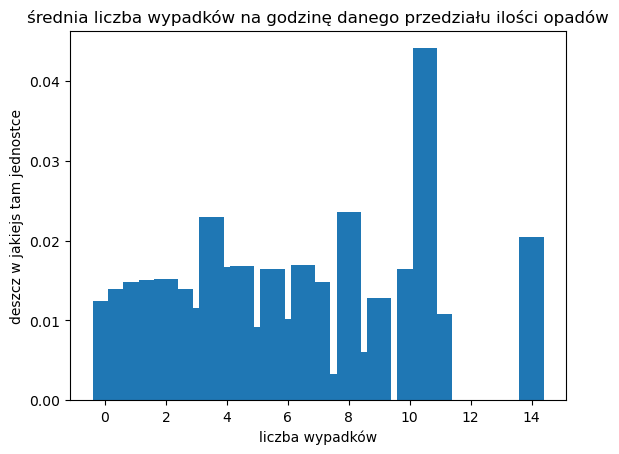

In [101]:
plt.bar(crashes_rain_count['RainClass'], crashes_rain_count['CrashCountNorm'])
plt.title('średnia liczba wypadków na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

In [102]:
# wygląda lepiej niż ten w power BI :) oczywiście problem jest taki że deszczów z dużymi wartościami jest mało więc np trzeba 
# by był